# S.CHARAN RAJU

# LOOPR

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import keras as f
print(f.__version__)

2.3.1


Using TensorFlow backend.


In [9]:
from tensorflow.keras import *
import matplotlib.pyplot as plt

In [5]:
train_datagen_with_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True)
train_datagen_with_no_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255)

In [6]:
train_generator = train_datagen_with_no_transforms.flow_from_directory(
    r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
train_generator_with_data_augmentation = train_datagen_with_transforms.flow_from_directory(
    r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)
validation_generator = val_datagen.flow_from_directory(
    r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data',
    target_size=(32, 32),
    batch_size=32,
    class_mode="sparse"
)

Found 651 images belonging to 5 classes.
Found 651 images belonging to 5 classes.
Found 651 images belonging to 5 classes.


In [7]:
nb_train_samples = train_generator.samples
nb_val_samples = validation_generator.samples

In [10]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [12]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
history = model.fit_generator(train_generator, steps_per_epoch=nb_train_samples/32, 
                    epochs=10, validation_data=validation_generator,
                    validation_steps=nb_val_samples/32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
21/20 [==============================] - 5s 217ms/step - loss: 2.1217 - accuracy: 0.2304 - val_loss: 1.6577 - val_accuracy: 0.2949
Epoch 2/10
21/20 [==============================] - 2s 73ms/step - loss: 1.5726 - accuracy: 0.2949 - val_loss: 1.4456 - val_accuracy: 0.3594
Epoch 3/10
21/20 [==============================] - 2s 77ms/step - loss: 1.3884 - accuracy: 0.4363 - val_loss: 1.2165 - val_accuracy: 0.5300
Epoch 4/10
21/20 [==============================] - 2s 78ms/step - loss: 1.1866 - accuracy: 0.5499 - val_loss: 1.0854 - val_accuracy: 0.6359
Epoch 5/10
21/20 [==============================] - 2s 80ms/step - loss: 1.0576 - accuracy: 0.5929 - val_loss: 0.9077 - val_accuracy: 0.6851
Epoch 6/10
21/20 [==============================] - 2s 78ms/step - loss: 0.8692 - accuracy: 0.6866 - val_loss: 0.7787 - val_accuracy: 0.7281
Epoch 7/10
21/20 [==============================] - 2s 82ms/step - loss: 0.73

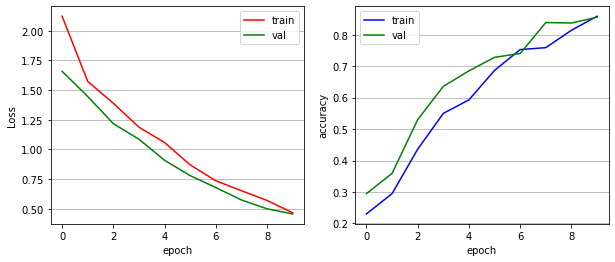

In [14]:
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_no_dropout")

# VGG-16

In [6]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications import *
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import keras
from glob import glob
import matplotlib.pyplot as plt

In [4]:
train_path=r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data'
test_path = r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data'

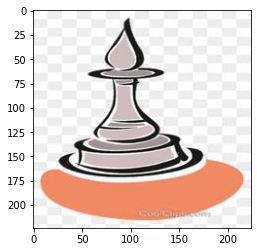

In [17]:
image = plt.imread(r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data\bishop_resized\00000272_resized.jpg')
plt.imshow(image)

In [19]:
IMAGE_SIZE = [224, 224]

In [63]:
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg.input

<tf.Tensor 'input_2:0' shape=(None, 224, 224, 3) dtype=float32>

In [64]:
vgg16 = VGG16(weights=None, include_top=True)

#Add a layer where input is the output of the  second last layer 
x = Dense(5, activation='softmax', name='predictions')(vgg16.layers[-2].output)

#Then create the corresponding model 
my_model = Model(input=vgg16.input, output=x)
my_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

<ipython-input-64-3f06e8eb7cb3>:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("pr...)`
  my_model = Model(input=vgg16.input, output=x)


In [21]:
for layer in vgg.layers:
  layer.trainable = False


In [22]:
folders = glob(r"C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data")
print(len(folders))

1


In [70]:
from keras import optimizers
import tensorflow as tf

adam = tf.optimizers.Adam()
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
my_model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [66]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [67]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 651 images belonging to 5 classes.


In [68]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 651 images belonging to 5 classes.


In [72]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(filepath='model.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]
model_history=my_model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=1,
  validation_steps=32,
    callbacks=callbacks,verbose=2)

Epoch 1/10
 - 317s - loss: 9397.7793 - accuracy: 0.2812 - val_loss: 1.9375 - val_accuracy: 0.2154

Epoch 00001: val_loss improved from inf to 1.93745, saving model to model.h5


C:\Users\Charan\anaconda3\lib\site-packages\keras\engine\saving.py:164: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  warnings.warn(


Epoch 2/10
 - 288s - loss: 2.2448 - accuracy: 0.2500 - val_loss: 1.6001 - val_accuracy: 0.2179

Epoch 00002: val_loss improved from 1.93745 to 1.60011, saving model to model.h5
Epoch 3/10


KeyboardInterrupt: 

In [73]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'model_history' is not defined

I Can't comment on performance because to the run epochs the time takes is high. so thats the reason i shelved in the middle

# RESNET-50

In [7]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model

import matplotlib.pyplot as plt
import numpy as np

import splitfolders

In [8]:
SEED = 42

TRAIN_R = 0.6  # Train ratio
VAL_R = 0.2
TEST_R = 0.2

IMG_HEIGHT, IMG_WIDTH = (224, 224)
BATCH_SIZE = 32

# DATA_DIR_PATH = "images"
# OUTPUT_DIR = "split_images"


# splitfolders.ratio(DATA_DIR_PATH, OUTPUT_DIR, seed=SEED, ratio=(TRAIN_R, VAL_R, TEST_R))

In [9]:
train_data_dir = r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data'
valid_data_dir = r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data'
test_data_dir = r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data'

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical")

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="categorical")


test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode="categorical")

Found 651 images belonging to 5 classes.
Found 651 images belonging to 5 classes.
Found 651 images belonging to 5 classes.


In [11]:
EPOCHS = 10

base_model = ResNet50(include_top=False, weights="imagenet")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)

predictions = Dense(train_generator.num_classes, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
for layer in base_model.layers:
    layer.trainable = False

In [13]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["acc"])


In [14]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=EPOCHS)

Epoch 1/10
21/21 [==============================] - 105s 5s/step - loss: 1.7741 - acc: 0.5300 - val_loss: 0.6314 - val_acc: 0.7588
Epoch 2/10
21/21 [==============================] - 115s 5s/step - loss: 0.4458 - acc: 0.8556 - val_loss: 0.2594 - val_acc: 0.9232
Epoch 3/10
21/21 [==============================] - 128s 6s/step - loss: 0.2825 - acc: 0.9032 - val_loss: 0.2058 - val_acc: 0.9386
Epoch 4/10
21/21 [==============================] - 115s 5s/step - loss: 0.2194 - acc: 0.9293 - val_loss: 0.1750 - val_acc: 0.9524
Epoch 5/10
21/21 [==============================] - 113s 5s/step - loss: 0.2021 - acc: 0.9462 - val_loss: 0.1256 - val_acc: 0.9631
Epoch 6/10
21/21 [==============================] - 111s 5s/step - loss: 0.1320 - acc: 0.9647 - val_loss: 0.0782 - val_acc: 0.9846
Epoch 7/10
21/21 [==============================] - 110s 5s/step - loss: 0.1303 - acc: 0.9647 - val_loss: 0.1089 - val_acc: 0.9647
Epoch 8/10
21/21 [==============================] - 102s 5s/step - loss: 0.1045 - a

# Inception

In [57]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import multi_gpu_model

In [77]:
import keras

In [78]:
from tensorflow.keras import layers

In [79]:
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [58]:
# train_dir = 'data/train'
# validation_dir = 'data/test'
train_dir=r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data'
validation_dir = r'C:\Users\Charan\Downloads\loopr_vit_dse_assignment_data'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')  # with data augmentation for train set

valid_datagen = ImageDataGenerator(rescale=1./255)  # no augmentation for validation set

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))


validation_generator= valid_datagen.flow_from_directory(validation_dir,
                                                         batch_size=100,
                                                         class_mode='categorical',
                                                         target_size=(150, 150))

Found 651 images belonging to 5 classes.
Found 651 images belonging to 5 classes.


In [59]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False, weights=None)

# Load Inception v3 weights into model
# local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# pre_trained_model.load_weights(local_weights_file)

In [60]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [61]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [80]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [81]:
x = layers.Flatten()(last_output)
x = layers.Dense(5, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

AttributeError: 'Node' object has no attribute 'output_masks'

# CNN-SVM

In [15]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import *

In [33]:
import tensorflow as tf

In [21]:
import numpy as np
path_root = 'C:\\Users\\Charan\\Downloads\\loopr_vit_dse_assignment_data'

In [22]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root,target_size=(64,64), batch_size=10000)

Found 651 images belonging to 5 classes.


In [23]:
batches.class_indices

{'Queen-Resized': 0,
 'Rook-resize': 1,
 'bishop_resized': 2,
 'knight-resize': 3,
 'pawn_resized': 4}

In [24]:
imgs, labels = next(batches)
imgs.shape

(651, 64, 64, 3)

In [25]:
import matplotlib.pyplot as plt
import numpy as np
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

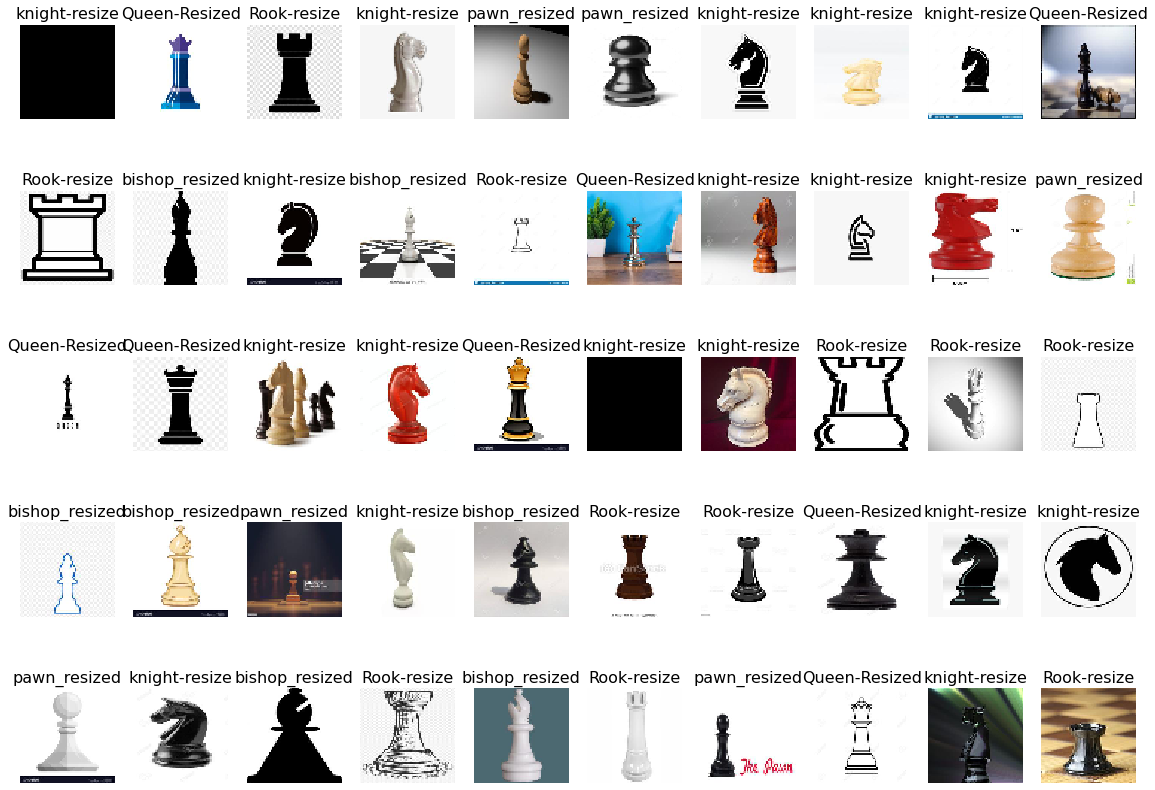

In [26]:
plots(imgs, titles = labels)

<BarContainer object of 5 artists>

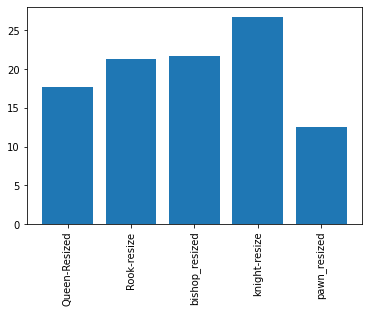

In [27]:
classes = batches.class_indices.keys()
perc = (sum(labels)/labels.shape[0])*100
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

# Train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [30]:
num_classes = 5
from tensorflow.keras.regularizers import l2

In [38]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
#     Malware_model.add(Dense(num_classes, activation='softmax'))
#     Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    Malware_model.add(Dense(5, kernel_regularizer=tf.keras.regularizers.l2(0.1),activation='softmax'))
    Malware_model.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])
    return Malware_model

In [39]:
model1 = malware_model()
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 30)        840       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 15)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2940)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [40]:
y_train_new = np.argmax(y_train, axis=1)

In [41]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train_new),
                                                 y_train_new)

In [43]:
validation_data=class_weights
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Train on 455 samples, validate on 196 samples
Epoch 1/30
455/455 [==============================] - 1s 2ms/step - loss: 1.3717 - accuracy: 0.5297 - val_loss: 1.3619 - val_accuracy: 0.4898
Epoch 2/30
455/455 [==============================] - 1s 2ms/step - loss: 1.3297 - accuracy: 0.5187 - val_loss: 1.3366 - val_accuracy: 0.4847
Epoch 3/30
455/455 [==============================] - 1s 2ms/step - loss: 1.2935 - accuracy: 0.5604 - val_loss: 1.2999 - val_accuracy: 0.5357
Epoch 4/30
455/455 [==============================] - 1s 2ms/step - loss: 1.2543 - accuracy: 0.5670 - val_loss: 1.2771 - val_accuracy: 0.5561
Epoch 5/30
455/455 [==============================] - 1s 2ms/step - loss: 1.2249 - accuracy: 0.6220 - val_loss: 1.2577 - val_accuracy: 0.5510
Epoch 6/30
455/455 [==============================] - 1s 2ms/step - loss: 1.2015 - accuracy: 0.6264 - val_loss: 1.2309 - val_accuracy: 0.5459
Epoch 7/30
455/455 [==============================] - 1s 2ms/step - loss: 1.1728 - accuracy: 0.6593 - 

In [45]:
scores = model1.evaluate(X_test, y_test)

196/196 [==============================] - 0s 600us/step


In [48]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
y_pred=np.argmax(model1.predict(X_test), axis=-1)

In [53]:
y_test2 = np.argmax(y_test, axis=1)

In [54]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

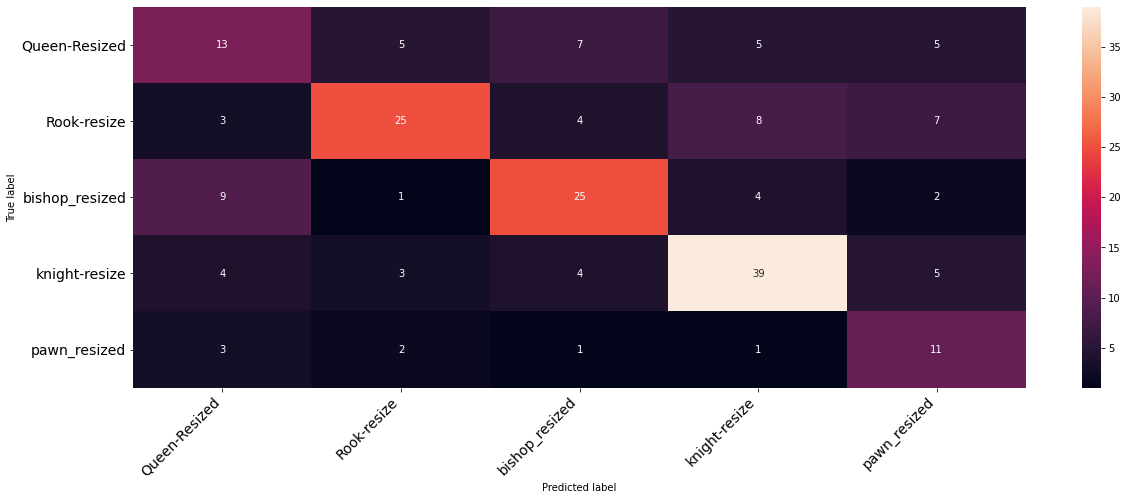

In [55]:
import pandas as pd
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)